# Stats

This notebook loads some data, reports some simple descriptive statistics (means, standard deviations etc) and shows a number of useful plots (scatter plots, histograms, time series plots).

Most of the descriptive stats use the standard package Statistics. The plots rely on the Plots package and the pdf and quantiles are from the [Distributions](https://github.com/JuliaStats/Distributions.jl) package.

For more stat functions, see the [StatsBase](https://github.com/JuliaStats/StatsBase.jl) package. (Not used here.)

Statistical calculations are often reported in tables. This notebook uses my own `printmat()` function. For more powerful alternatives, consider the [PrettyTables](https://github.com/ronisbr/PrettyTables.jl) package.

## Load Packages and Extra Functions

In [1]:
using Statistics, Printf, Dates, LinearAlgebra, DelimitedFiles, Distributions

include("jlFiles/printmat.jl")

printyellow (generic function with 1 method)

In [2]:
using Plots

#pyplot(size=(600,400))
gr(size=(480,320))
default(fmt = :svg)

# Load Data from a csv File

The following is a portion of MyData.csv:

```
date,Mkt-RF,RF,SmallGrowth
197901,4.18,0.77,10.96
197902,-3.41,0.73,-2.09
197903,5.75,0.81,11.71
197904,0.05,0.8,3.27
```

In [3]:
x = readdlm("Data/MyData.csv",',',skipstart=1)  #reading the csv file
                                                #skip 1st line
println("\nfirst four lines of x:")
printmat(x[1:4,:])


first four lines of x:
197901.000     4.180     0.770    10.960
197902.000    -3.410     0.730    -2.090
197903.000     5.750     0.810    11.710
197904.000     0.050     0.800     3.270



### Creating Variables

In [4]:
ym  = round.(Int,x[:,1])             #yearmonth, like 200712
(Rme,Rf,R) = (x[:,2],x[:,3],x[:,4])  #creating variables from columns of x
Re  = R - Rf                         #do R .- Rf if R has several columns
dN = Date.(string.(ym),"yyyymm") #convert to string and then to Julia Date

println("first 4 obs of Rme and Re")
printmat([dN[1:4] Rme[1:4,:] Re[1:4,:]])

first 4 obs of Rme and Re
1979-01-01     4.180    10.190
1979-02-01    -3.410    -2.820
1979-03-01     5.750    10.900
1979-04-01     0.050     2.470



# Some Descriptive Statistics

## Means and Standard Deviations

The next few cells estimate means, standard deviations, covariances and correlations of the variables `Rme` (US equity market excess return) and `Re` (excess returns for a segment of the market, small growth firms). 

In [5]:
μ = mean([Rme Re],dims=1)    #,dims=1 to calculate average along a column
σ = std([Rme Re],dims=1)     #do \sigma[Tab] to get σ

printmat([μ;σ],colNames=["Rme","Re"],rowNames=["mean","std"])

           Rme        Re
mean     0.602     0.303
std      4.604     8.572



## Covariances and Correlations

In [6]:
println("\n","cov([Rme Re]): ")
printmat(cov([Rme Re]))

println("\n","cor([Rme Re]): ")
printmat(cor([Rme Re]))


cov([Rme Re]): 
    21.197    28.426
    28.426    73.475


cor([Rme Re]): 
     1.000     0.720
     0.720     1.000



## OLS

A linear regression
$
y_t = x_t'b + u_t
$,
where $x_t=[1;R^e_{m,t}]$.

Clearly, the first element of $b$ is the intercept and the second element is the slope coefficient.

The code below creates a $Tx2$ matrix `x` with $x'_t$ on row $t$. $y$ is a T-element vector (or $Tx1$).

The GLM package (not used here) has powerful regression methods. See https://github.com/JuliaStats/GLM.jl.

In [7]:
c   = ones(size(Rme,1))         #a vector with ones, no. rows from variable
x   = [c Rme]                   #x is a Tx2 matrix
y   = copy(Re)                  #to get standard OLS notation

b2  = inv(x'x)*x'y              #OLS according to a textbook
b   = x\y                       #also OLS, numerically more stable
u   = y - x*b                   #OLS residuals
R2  = 1 - var(u)/var(y)         #R2

println("OLS coefficients, regressing Re on constant and Rme")
printmat([b b2],colNames=["Calc 1","Calc 2"],rowNames=["c","Rme"])
printlnPs("R2: ",R2) 
printlnPs("no. of observations: ",size(Re,1))

OLS coefficients, regressing Re on constant and Rme
       Calc 1    Calc 2
c      -0.504    -0.504
Rme     1.341     1.341

      R2:      0.519
no. of observations:    388    


In [8]:
Covb  = inv(x'x)*var(u)         #covariance matrix of b estimates
Stdb  = sqrt.(diag(Covb))       #std of b estimates
tstat = (b .- 0)./Stdb          #t-stats, replace 0 with your null hypothesis 

println("\ncoeffs and t-stats")
printmat([b tstat],colNames=["Coef","t-stat"],rowNames=["c","Rme"])


coeffs and t-stats
         Coef    t-stat
c      -0.504    -1.656
Rme     1.341    20.427



# Drawing Random Numbers and Finding Critical Values

## Random Numbers: Independent Variables

In [9]:
T = 100
x = randn(T,2)    #T x 2 matrix, N(0,1) distribution

println("\n","mean and std of random draws: ")
μ = mean(x,dims=1)
σ = std(x,dims=1)
printmat([μ;σ],colNames=["series 1","series 2"],rowNames=["mean","std"])

println("covariance matrix:")
printmat(cov(x))
println("correlation matrix:")
printmat(cor(x))


mean and std of random draws: 
      series 1  series 2
mean     0.140     0.150
std      1.038     1.051

covariance matrix:
     1.078     0.057
     0.057     1.104

correlation matrix:
     1.000     0.052
     0.052     1.000



## Random Numbers: Correlated Variables

In [10]:
μ = [-1,10]          #vector of means
Σ = [1 0.5;          #covariance matrix
     0.5 2]

T = 100
x = rand(MvNormal(μ,Σ),T)'  #random numbers, T x 2, drawn from bivariate N(μ,Σ)

println("covariance matrix")
printmat(cov(x))
println("correlation matrix:")
printmat(cor(x))

covariance matrix
     1.097     0.766
     0.766     2.539

correlation matrix:
     1.000     0.459
     0.459     1.000



## Quantiles ("critical values") of Distributions

In [11]:
N05     = quantile(Normal(0,1),0.05)            #from the Distributions package
Chisq05 = quantile(Chisq(5),0.95)

println("\n","5th percentile of N(0,1) and 95th of Chisquare(5)")      #lots of statistics functions
printmat([N05 Chisq05])


5th percentile of N(0,1) and 95th of Chisquare(5)
    -1.645    11.070



# Statistical Plots

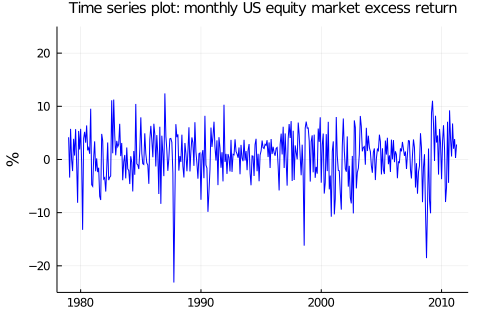

In [12]:
xTicksLoc = [Date(1980),Date(1990),Date(2000),Date(2010)]
xTicksLab = Dates.format.(xTicksLoc,"Y")

p1 = plot( dN,Rme,
           linecolor = :blue,
           legend = false,
           xticks = (xTicksLoc,xTicksLab),
           ylim = (-25,25),
           title = "Time series plot: monthly US equity market excess return",
           titlefont = font(10),
           ylabel = "%" )
display(p1)

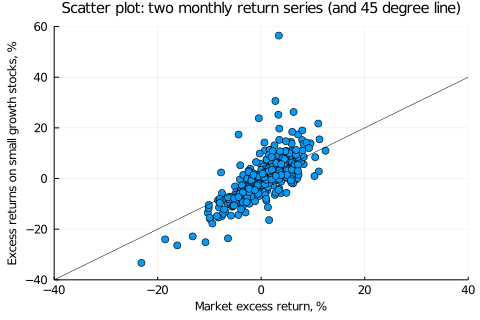

In [13]:
p1 = scatter( Rme,Re,
              fillcolor = :blue,
              legend = false,
              xlim = (-40,40),
              ylim = (-40,60),
              title = "Scatter plot: two monthly return series (and 45 degree line)",
              titlefont = font(10),
              xlabel = "Market excess return, %",
              ylabel = "Excess returns on small growth stocks, %",
              guidefont = font(8) )
plot!([-40;60],[-40;60],color=:black,linewidth=0.5)   #easier to keep this outside plot()
display(p1)

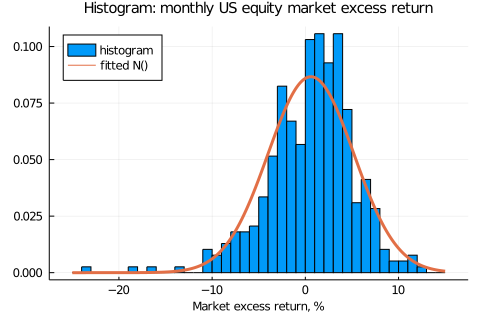

In [14]:
xGrid = -25:0.1:15
pdfX  = pdf.(Normal(mean(Rme),std(Rme)),xGrid) #"Distributions" wants σ, not σ^2

p1 = histogram( Rme,bins = -25:1:15,
                normalized = true,     #normalized to have area=1
                label = "histogram",
                title = "Histogram: monthly US equity market excess return",
                titlefont = font(10),
                xlabel = "Market excess return, %",
                legend = :topleft,
                guidefont = font(8) )   #font size of axis labels
plot!(xGrid,pdfX,linewidth=3,label="fitted N()")
display(p1)